In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import normaltest
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 300000

In [2]:
# Read in the data
df = pd.read_csv('assets/updated_house_df.csv')
df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,type_and_use,physical_zip_code,physical_city,...,us_house_afford_index,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,1.5,1.0,27603,raleigh,...,120.5,NaN,NaN,2000,2049,1,0,0,0,0
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,2.0,1.0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,2.5,1.0,27607,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,2.0,1.0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,1.5,1.0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1


In [3]:
int_rate_df = pd.read_csv('assets/us_int_rate.csv')
int_rate_df.drop(columns=['Unnamed: 0'], inplace=True)
int_rate_df.rename(columns={'year':'date'},inplace=True)

year_list = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
             '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
             '2014', '2015', '2016', '2017', '2018', '2019', '2020', 
             '2021']

In [4]:
# Create a new dataframe with the data we want to plot
df['year'] = df['deed_date'].apply(lambda x: x.split('-')[0])
int_rate_df['year'] = int_rate_df['date'].apply(lambda x: x.split('-')[0])

house_mean_price_dict = {}
house_median_price_dict = {}
building_mean_price_dict = {}
building_median_price_dict = {}
land_mean_price_dict = {}
land_median_price_dict = {}
interest_rate_dict = {}
mort_rate_dict = {}
unemploy_rate_dict = {}
pop_growth_rate_dict = {}
lumber_price_dict = {}
metals_price_dict = {}
manufactured_house_number_dict = {}
hai_dict = {}
wake_supply_index_dict = {}
wake_demand_index_dict = {}
crime_dict = {}

for year in year_list:
    house_mean_price_dict[year] = 0
    house_mean_price_dict[year] = (df[df['year'] == year]['total_sale_price'].mean())
    house_median_price_dict[year] = 0
    house_median_price_dict[year] = (df[df['year'] == year]['total_sale_price'].median())
    building_mean_price_dict[year] = 0
    building_mean_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].mean())
    building_median_price_dict[year] = 0
    building_median_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].median())
    land_mean_price_dict[year] = 0
    land_mean_price_dict[year] = (df[df['year'] == year]['land_sale_price'].mean())
    land_median_price_dict[year] = 0
    land_median_price_dict[year] = (df[df['year'] == year]['land_sale_price'].median())
    interest_rate_dict[year] = 0
    interest_rate_dict[year] = (int_rate_df[int_rate_df['year'] == year]['int_rate'].values[0])

    mort_rate_dict[year] = 0
    mort_rate_dict[year] = (df[df['year'] == year]['mort_rate'].values[0])
    unemploy_rate_dict[year] = 0
    unemploy_rate_dict[year] = (df[df['year'] == year]['unemploy_rate'].values[0])
    pop_growth_rate_dict[year] = 0
    pop_growth_rate_dict[year] = (df[df['year'] == year]['pop_growth_rate'].values[0])
    lumber_price_dict[year] = 0
    lumber_price_dict[year] = (df[df['year'] == year]['lumber_price'].values[0])
    metals_price_dict[year] = 0
    metals_price_dict[year] = (df[df['year'] == year]['metals_price'].values[0])
    manufactured_house_number_dict['year'] = 0
    # manufactured_house_number_dict['year'] = (df[df['year'] == year]['manufactured_house_number'].values[0])
    # hai_dict[year] = 0
    # hai_dict[year] = (df[df['year'] == year]['hai'].values[0])
    # wake_supply_index_dict[year] = 0
    # wake_supply_index_dict[year] = (df[df['year'] == 'year']['wake_supply_index'][0])
    # wake_demand_index_dict[year] = 0
    # wake_demand_index_dict[year] = (df[df['year'] == 'year']['wake_demand_index'][0])
    crime_dict[year] = 0
    crime_dict[year] = (df[df['year'] == year]['crime'].values[0])

price_summary = pd.DataFrame(house_mean_price_dict.values(), house_mean_price_dict.keys(), columns=['sale_price_mean'])
price_summary['sale_price_median'] = house_median_price_dict.values()
price_summary['building_mean'] = building_mean_price_dict.values()
price_summary['building_median'] = building_median_price_dict.values()
price_summary['land_mean'] = land_mean_price_dict.values()
price_summary['land_median'] = land_median_price_dict.values()
price_summary['interest_rate'] = interest_rate_dict.values()
price_summary['mort_rate'] = mort_rate_dict.values()
price_summary['unemploy_rate'] = unemploy_rate_dict.values()
price_summary['pop_growth_rate'] = pop_growth_rate_dict.values()
price_summary['lumber_price'] = lumber_price_dict.values()
price_summary['metals_price'] = metals_price_dict.values()
# price_summary['manufactured_house_number'] = manufactured_house_number_dict.values()
# price_summary['hai'] = hai_dict.values()
# price_summary['wake_supply_index'] = wake_supply_index_dict.values()
# price_summary['wake_demand_index'] = wake_demand_index_dict.values()
price_summary['crime'] = crime_dict.values()

price_summary.reset_index(inplace=True)
price_summary.rename(columns={'index':'year'}, inplace=True)
price_summary.sort_values('year', inplace=True)
price_summary.reset_index(drop=True, inplace=True)

price_summary.head()

,year,sale_price_mean,sale_price_median,building_mean,building_median,land_mean,land_median,interest_rate,mort_rate,unemploy_rate,pop_growth_rate,lumber_price,metals_price,crime
0,2000,197374.112507,169000.0,233818.286455,208789.0,15423.538777,0.0,6.813424,8.52,2.4,NaN,180.3,118.4,2049
1,2001,198820.381021,167000.0,248214.174455,203162.0,14833.959741,0.0,4.565848,7.08,3.0,0.037191,170.0,110.2,108
2,2002,203604.418730,168000.0,231659.967492,203204.0,15198.230571,0.0,3.068643,6.05,5.7,0.029800,167.7,117.9,1966
3,2003,294630.513578,176000.0,234102.037248,208665.0,15577.299266,0.0,2.107311,6.15,5.1,0.028614,183.3,122.0,109
4,2004,224036.251213,184000.0,239899.163539,213171.5,17568.523293,0.0,1.612311,5.75,4.2,0.029594,218.5,174.0,8


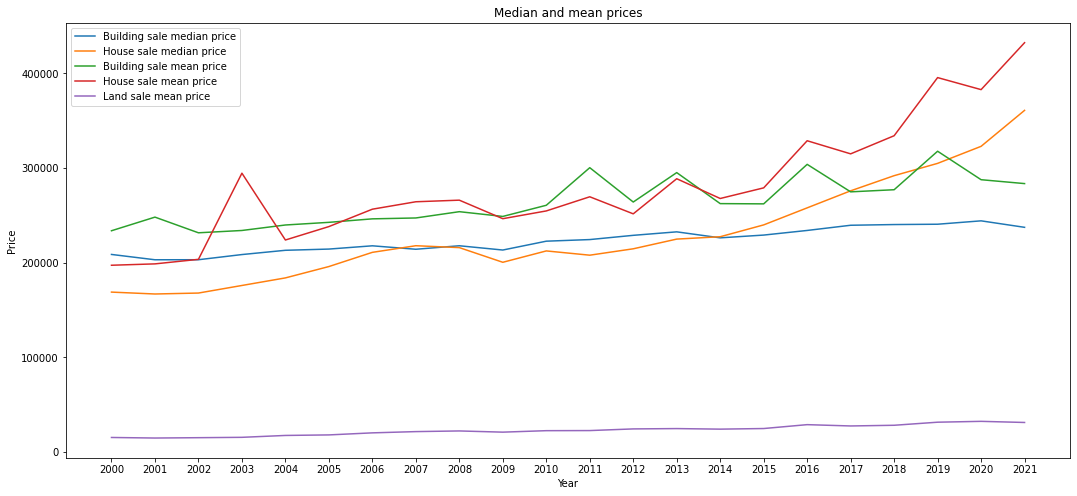

In [67]:
# Create a line chart of the mean and median house, building and land prices
plt.figure(figsize=(18,8))
plt.plot(price_summary['year'], price_summary['building_median'], label='Building sale median price')
plt.plot(price_summary['year'], price_summary['sale_price_median'], label='House sale median price')
plt.plot(price_summary['year'], price_summary['building_mean'], label='Building sale mean price')
plt.plot(price_summary['year'], price_summary['sale_price_mean'], label='House sale mean price')
plt.plot(price_summary['year'], price_summary['land_mean'], label='Land sale mean price')

plt.legend()
plt.title('Median and mean prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Frequencies plots

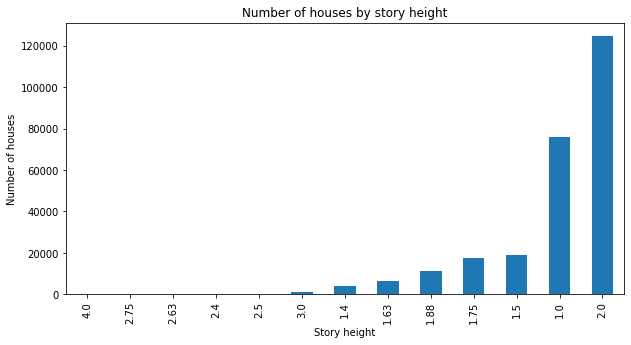

In [68]:
df['story_height'].value_counts().sort_values().plot(kind='bar', x='story_height', y='counts', title='Number of houses by story height', figsize=(10,5))
plt.xlabel('Story height')
plt.ylabel('Number of houses')
plt.show()

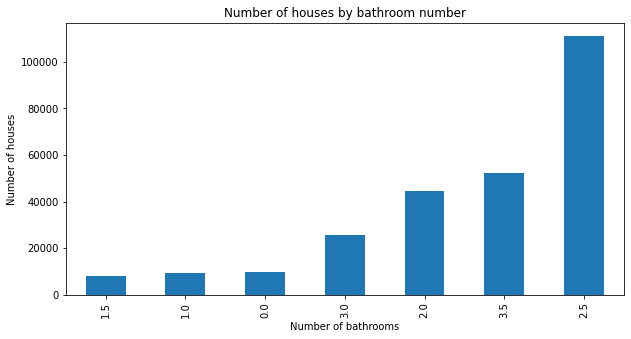

In [69]:
df['bath'].value_counts().sort_values().plot(kind='bar', x='number of bathrooms', y='counts', title='Number of houses by bathroom number', figsize=(10,5))
plt.xlabel('Number of bathrooms')
plt.ylabel('Number of houses')
plt.show()

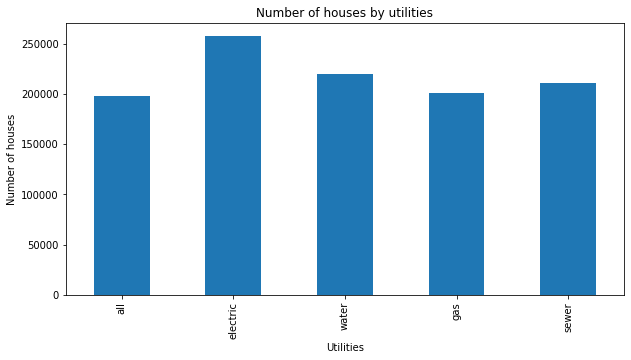

In [70]:
utilities_df = df[['all', 'electric','water','gas','sewer']]
sum_utilities = utilities_df.sum()
sum_utilities.plot.bar(x='utilities', y='counts', title='Number of houses by utilities', figsize=(10,5))
plt.xlabel('Utilities')
plt.ylabel('Number of houses')
plt.show()

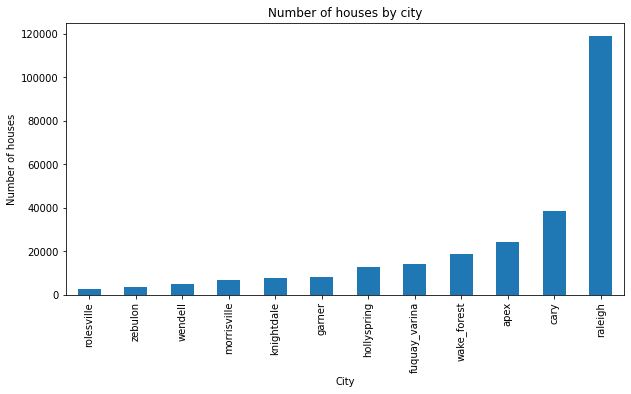

In [71]:
df['physical_city'].value_counts().sort_values().plot(kind='bar', x='City', y='counts', title='Number of houses by city', figsize=(10,5))
plt.xlabel('City')
plt.ylabel('Number of houses')
plt.show()

Based on the above chart, Raleigh city has the most counts of houses.

<AxesSubplot:title={'center':'Mean house price by city'}, xlabel='physical_city'>

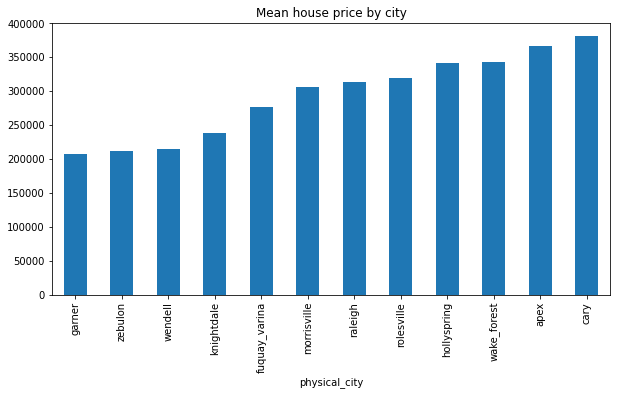

In [82]:
df.groupby('physical_city')['total_sale_price'].mean().sort_values().plot(kind='bar', x='City', y='mean', title='Mean house price by city', figsize=(10,5))

<AxesSubplot:title={'center':'Mean house price by city'}, xlabel='physical_city'>

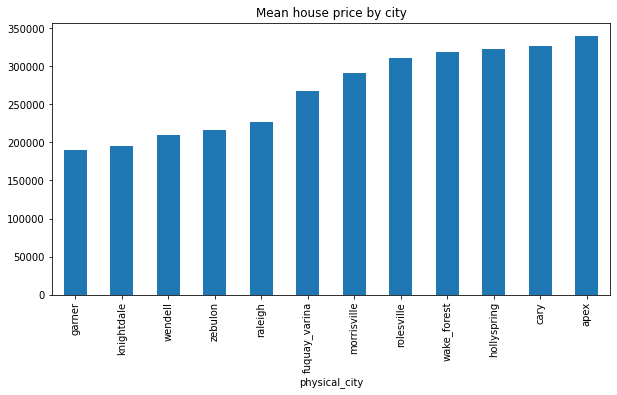

In [83]:
df.groupby('physical_city')['total_sale_price'].median().sort_values().plot(kind='bar', x='City', y='mean', title='Mean house price by city', figsize=(10,5))

<AxesSubplot:title={'center':'Mean house price by city and year'}, xlabel='year'>

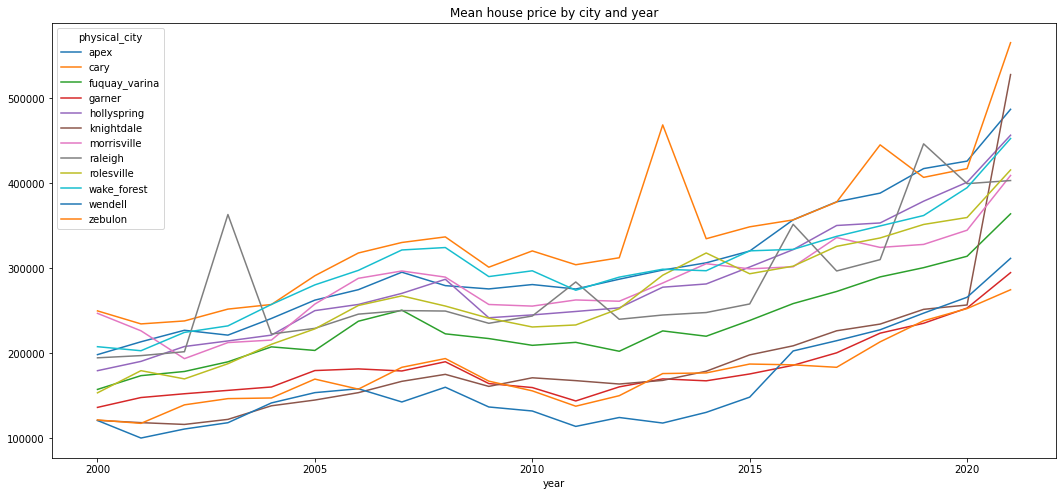

In [128]:
new_df = df[['year', 'physical_city', 'total_sale_price']]
new_df.groupby(['year','physical_city'])['total_sale_price'].mean().unstack().plot(kind='line', figsize=(18,8), title='Mean house price by city and year')

Based on the above charts, Cary, Apex, Wake Forest, Hollyspring and Molesville are top 5 house sale prices. Garner has the lowest house sale price.

## Summary of data

In [6]:
df[['land_sale_price', 'total_sale_price', 'assessed_building_value', 'story_height', 'heated_area', 'bath']].describe(include='all')

,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath
count,2.608880e+05,2.608880e+05,2.608880e+05,260816.000000,260888.000000,260802.000000
mean,2.629445e+04,3.208137e+05,2.756318e+05,1.635982,2320.721532,2.487270
std,5.885476e+04,7.915469e+05,6.316283e+05,0.442382,1049.580054,0.782634
min,0.000000e+00,5.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,1.720000e+05,1.641230e+05,1.000000,1565.000000,2.000000
50%,0.000000e+00,2.650000e+05,2.311710e+05,1.880000,2141.000000,2.500000
75%,3.972300e+04,3.845000e+05,3.244202e+05,2.000000,2857.000000,3.000000
max,5.538500e+06,7.060000e+07,5.673290e+07,4.000000,38730.000000,3.500000


## Test the normality of data
There are several methods testing the normality of data. We will use distribution plots and QQ plot for the project. We do not 
use Shapiro-Wilk test because the sample size of the dataset is much greater than 5,000 because p-value calculation is not 
trusted much for sample sizes above about 5,000.
### Distribution plots
Simply generate distribution plots for mean/median price of house sale/building price to see if the plot is normal distribution.
1. House median sale price
   
   Median house sale price is right-tailed which is non-normal distributed.

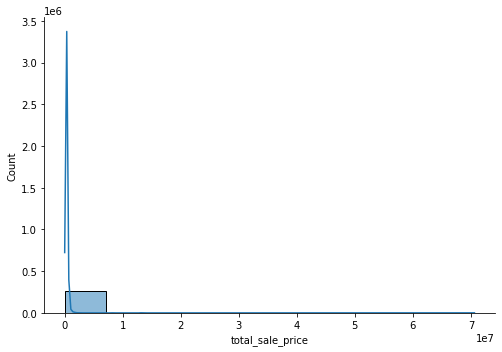

In [7]:
sns.displot(df['total_sale_price'], bins=10, kde=True, height=5, aspect=11.7/8.27)

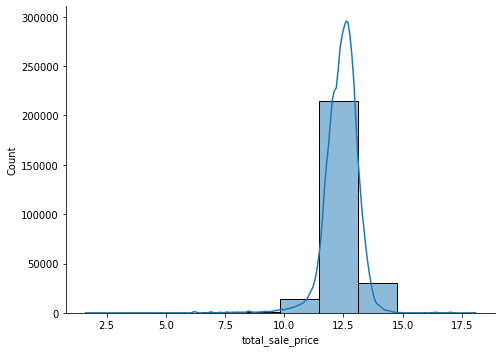

In [8]:
sns.displot(np.log(df['total_sale_price']), bins=10, kde=True, height=5, aspect=11.7/8.27)

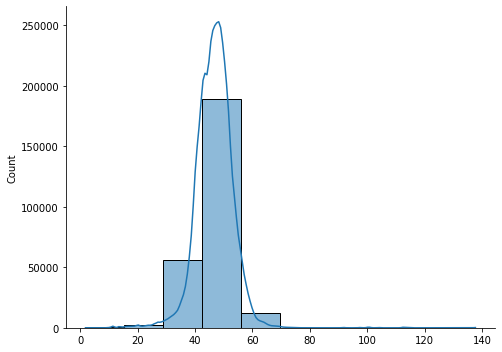

In [9]:
sns.displot(stats.boxcox(df.total_sale_price)[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
plt.show()

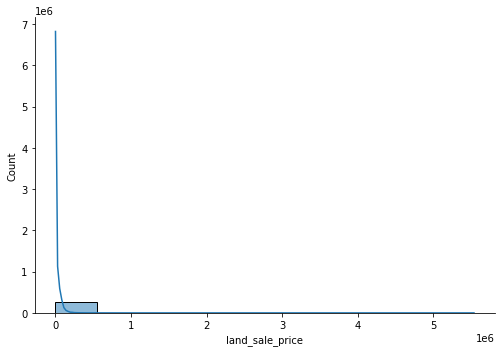

In [10]:
sns.displot(df['land_sale_price'], bins=10, kde=True, height=5, aspect=11.7/8.27)

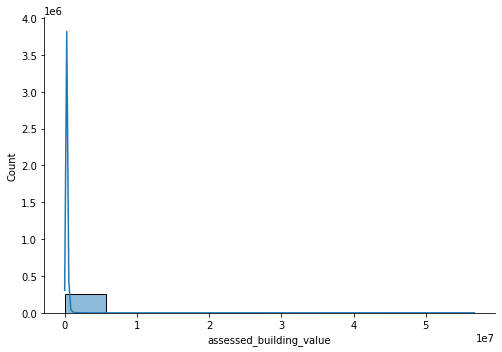

In [11]:
sns.displot(df['assessed_building_value'], bins=10, kde=True, height=5, aspect=11.7/8.27)

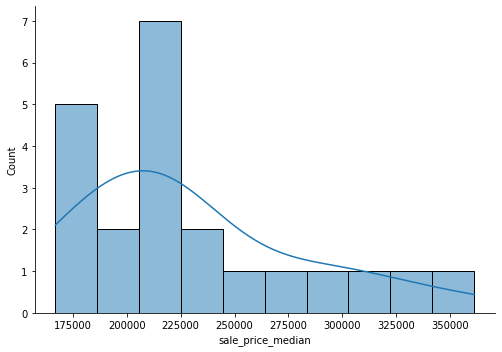

In [12]:
sns.displot(price_summary['sale_price_median'], bins=10, kde=True, height=5, aspect=11.7/8.27)

2. House mean sale price
   
   Mean house sale price is right-tailed which is non-normal distributed.

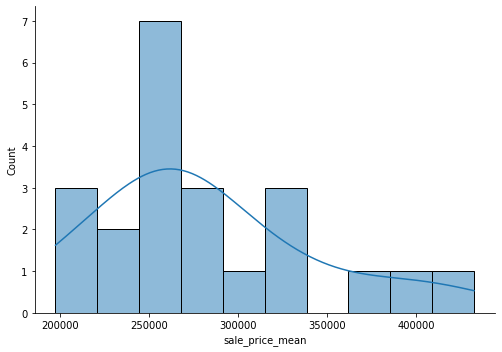

In [13]:
sns.displot(price_summary['sale_price_mean'], bins=10, kde=True, height=5, aspect=11.7/8.27)

3. House median building price
   
   Median building sale price is closed to normal distributed, but not typically.

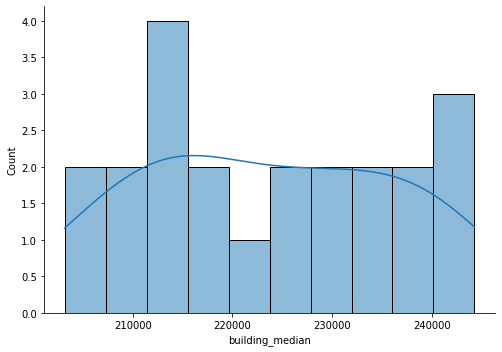

In [14]:
sns.displot(price_summary['building_median'], bins=10, kde=True, height=5, aspect=11.7/8.27)

4. House mean building price
   
   Mean house sale price is right-tailed which is non-normal distributed.

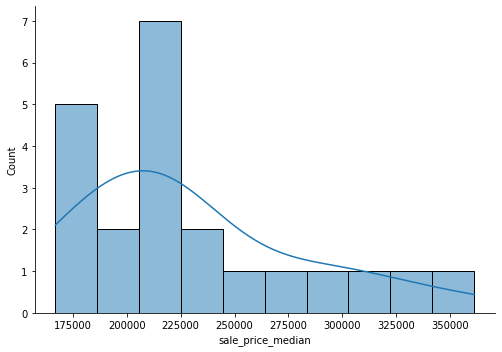

In [15]:
sns.displot(price_summary['sale_price_median'], bins=10, kde=True, height=5, aspect=11.7/8.27)

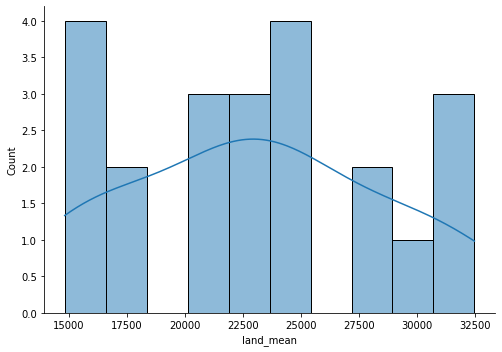

In [16]:
sns.displot(price_summary['land_mean'], bins=10, kde=True, height=5, aspect=11.7/8.27)

### QQ plot
Quantile-Quantile plot is another popular method for checking the distribution.
1. House median sale price

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


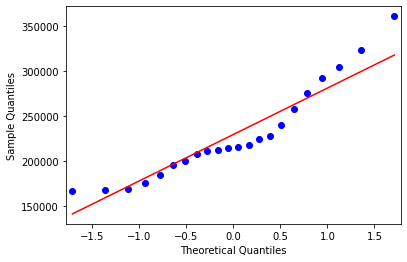

In [17]:
fig = sm.qqplot(price_summary['sale_price_median'], line='s')
plt.show()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


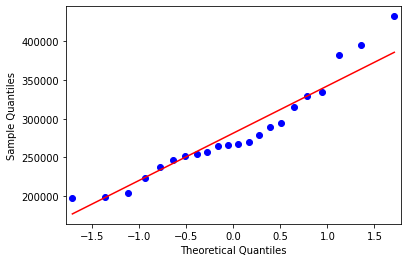

In [18]:
fig = sm.qqplot(price_summary['sale_price_mean'], line='s')
plt.show()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


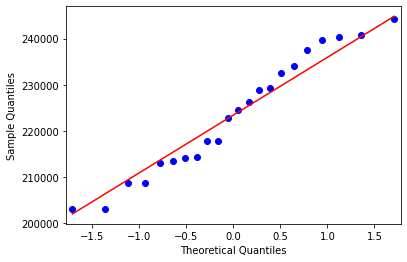

In [19]:
fig = sm.qqplot(price_summary['building_median'], line='s')
plt.show()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


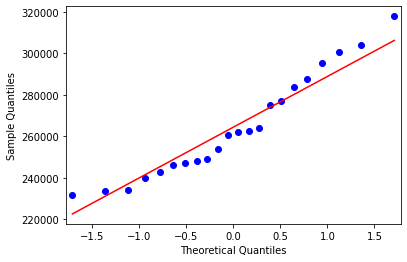

In [20]:
fig = sm.qqplot(price_summary['building_mean'], line='s')
plt.show()

### D'Agostino's K^2 Test
The D'Agostino's K^2 test calculates summary statistics from the data.
1. House median sale price

In [21]:
# normalize test
stat, p = normaltest(price_summary['sale_price_median'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Sample looks Gaussian (fail to reject H0)


2.  House mean sale price

In [22]:
# normalize test
stat, p = normaltest(price_summary['sale_price_mean'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Sample looks Gaussian (fail to reject H0)


3. Building median sale price

In [23]:
# normalize test
stat, p = normaltest(price_summary['building_median'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Sample looks Gaussian (fail to reject H0)


4. Building mean sale price

In [24]:
# normalize test
stat, p = normaltest(price_summary['building_mean'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Sample looks Gaussian (fail to reject H0)


5. Land mean sale price

In [25]:
# normalize test
stat, p = normaltest(price_summary['land_mean'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    

Sample looks Gaussian (fail to reject H0)


### Hard fail of normality tests
A failure of one normality test means that the data is not normal even though the last test, 
D'Agostino's K^2 Test, shows all data is normally distributed.

The next step is to normalize house sale and building price data.

### Fix the normality issue
There are two ways to transform a continuous (numeric) variable to make the transformed variable looks 
normally distributed.
1. Box-Cox power transformation

In [26]:
# df.columns

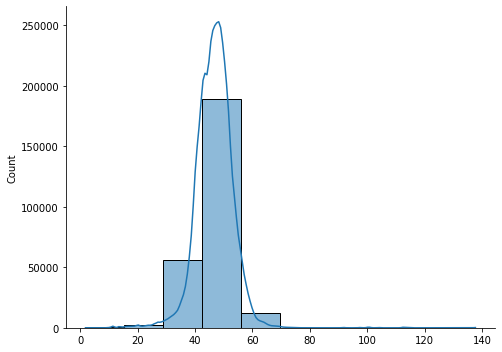

In [27]:
sns.displot(stats.boxcox(df.total_sale_price)[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
plt.show()

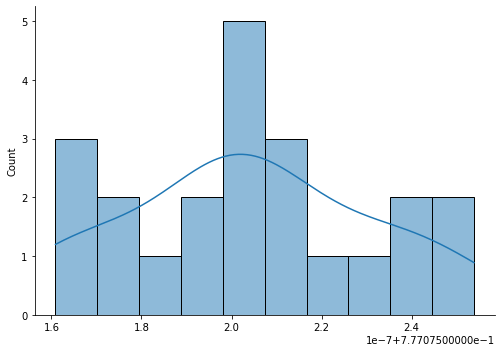

In [28]:
sns.displot(stats.boxcox(price_summary.sale_price_median)[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
plt.show()

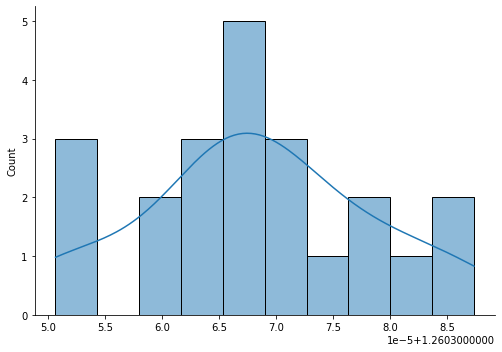

In [29]:
sns.displot(stats.boxcox(price_summary.sale_price_mean)[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
plt.show()

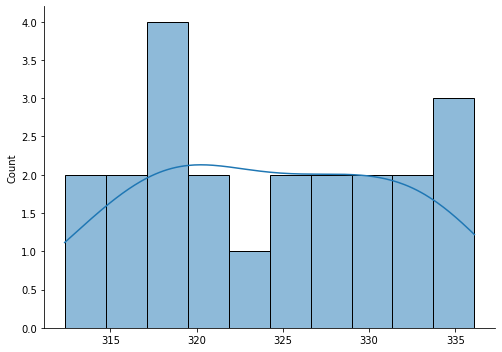

In [30]:
sns.displot(stats.boxcox(price_summary.building_median)[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
plt.show()

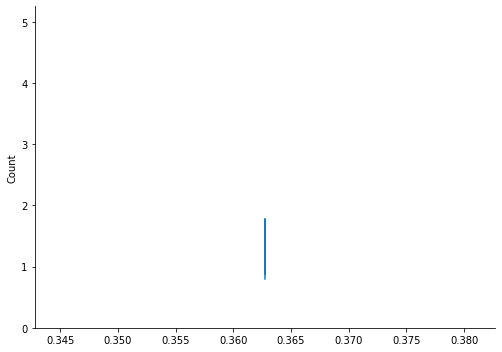

In [31]:
sns.displot(stats.boxcox(price_summary.building_mean)[0], bins=20, kde=True, height=5, aspect=11.7/8.27)
plt.show()

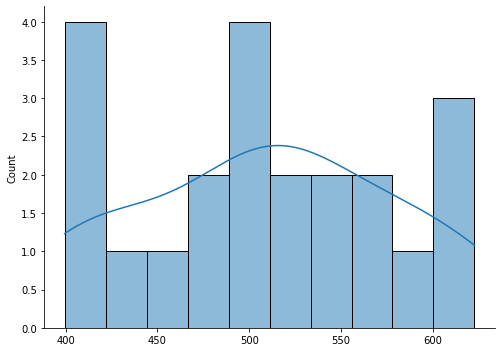

In [32]:
sns.displot(stats.boxcox(price_summary.land_mean)[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
plt.show()

2. Yeo-Johnson power transformation

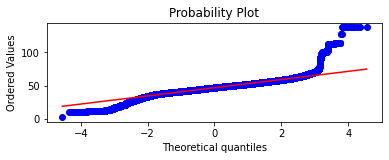

In [33]:
fig = plt.figure()
xt, lmbda = stats.yeojohnson(df.total_sale_price)
ax = fig.add_subplot(212)
stats.probplot(xt, dist=stats.norm, plot=ax)
plt.show()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2217: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


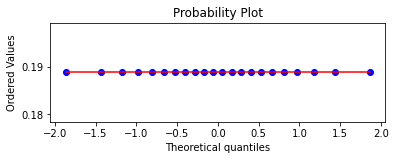

In [34]:
fig = plt.figure()
xt, lmbda = stats.yeojohnson(price_summary.sale_price_median)
ax = fig.add_subplot(212)
stats.probplot(xt, dist=stats.norm, plot=ax)
plt.show()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2217: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


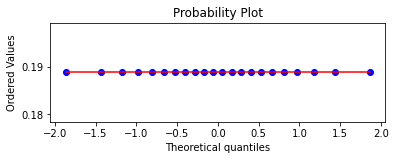

In [35]:
fig = plt.figure()
xt, lmbda = stats.yeojohnson(price_summary.sale_price_mean)
ax = fig.add_subplot(212)
stats.probplot(xt, dist=stats.norm, plot=ax)
plt.show()

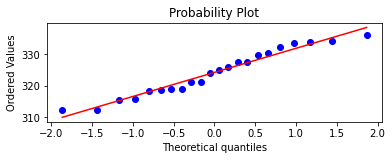

In [36]:
fig = plt.figure()
xt, lmbda = stats.yeojohnson(price_summary.building_median)
ax = fig.add_subplot(212)
stats.probplot(xt, dist=stats.norm, plot=ax)
plt.show()

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2217: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


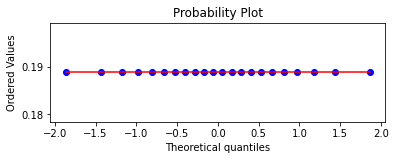

In [37]:
fig = plt.figure()
xt, lmbda = stats.yeojohnson(price_summary.building_mean)
ax = fig.add_subplot(212)
stats.probplot(xt, dist=stats.norm, plot=ax)
plt.show()

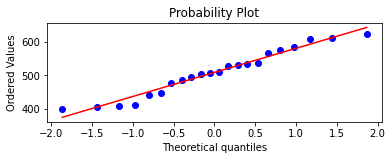

In [38]:
fig = plt.figure()
xt, lmbda = stats.yeojohnson(price_summary.land_mean)
ax = fig.add_subplot(212)
stats.probplot(xt, dist=stats.norm, plot=ax)
plt.show()

We use Box-Cox transformation to normalize mean and median values

In [39]:
price_summary['norm_sale_median'] = stats.boxcox(price_summary.sale_price_median)[0]
price_summary['norm_sale_mean'] = stats.boxcox(price_summary.sale_price_mean)[0]
price_summary['norm_building_median'] = stats.boxcox(price_summary.building_median)[0]
price_summary['norm_building_mean'] = stats.boxcox(price_summary.building_mean)[0]
price_summary['norm_land_mean'] = stats.boxcox(price_summary.land_mean)[0]
price_summary.head()

,year,sale_price_mean,sale_price_median,building_mean,building_median,land_mean,land_median,interest_rate,mort_rate,unemploy_rate,pop_growth_rate,lumber_price,metals_price,crime,norm_sale_median,norm_sale_mean,norm_building_median,norm_building_mean,norm_land_mean
0,2000,197374.112507,169000.0,233818.286455,208789.0,15423.538777,0.0,6.813424,8.52,2.4,NaN,180.3,118.4,2049,0.777075,1.260351,315.768847,0.362714,408.420177
1,2001,198820.381021,167000.0,248214.174455,203162.0,14833.959741,0.0,4.565848,7.08,3.0,0.037191,170.0,110.2,108,0.777075,1.260351,312.356080,0.362714,399.491871
2,2002,203604.418730,168000.0,231659.967492,203204.0,15198.230571,0.0,3.068643,6.05,5.7,0.029800,167.7,117.9,1966,0.777075,1.260353,312.381764,0.362714,405.026062
3,2003,294630.513578,176000.0,234102.037248,208665.0,15577.299266,0.0,2.107311,6.15,5.1,0.028614,183.3,122.0,109,0.777075,1.260372,315.694245,0.362714,410.724093
4,2004,224036.251213,184000.0,239899.163539,213171.5,17568.523293,0.0,1.612311,5.75,4.2,0.029594,218.5,174.0,8,0.777075,1.260358,318.388439,0.362714,439.714501


3. Min-Max Normalization

In [40]:
new_df = df[['land_sale_price', 'total_sale_price', 'assessed_building_value']]
scaler = MinMaxScaler()
print(scaler.fit(new_df))

df_scaled = scaler.fit_transform(new_df)
df_scaled.min(axis=0)
df_scaled.max(axis=0)
df_manual_scaled = (new_df - new_df.min()) / (new_df.max() - new_df.min())
df_manual_scaled.rename(columns={'land_sale_price': 'land_sale_price_scaled', 'total_sale_price': 'total_sale_price_scaled', 'assessed_building_value': 'assessed_building_value_scaled'}, inplace=True)
df_manual_scaled.head()

MinMaxScaler()


,land_sale_price_scaled,total_sale_price_scaled,assessed_building_value_scaled
0,0.0,0.000248,0.002378
1,0.0,0.002040,0.003077
2,0.0,0.003668,0.004376
3,0.0,0.001855,0.003072
4,0.0,0.001558,0.002030


In [41]:
y_df = df[['story_height', 'bath', 'heated_area']]
scaler = MinMaxScaler()
y_df_scaled = scaler.fit_transform(y_df)
y_manual_scaled = (y_df - y_df.min()) / (y_df.max() - y_df.min())
y_manual_scaled.rename(columns={'story_height': 'story_height_scaled', 'bath': 'bath_scaled', 'heated_area': 'heat_area_scaled'}, inplace=True)
y_manual_scaled.head()

,story_height_scaled,bath_scaled,heat_area_scaled
0,0.000000,0.428571,0.033566
1,0.000000,0.571429,0.048748
2,0.333333,0.714286,0.068371
3,0.000000,0.571429,0.055461
4,0.000000,0.428571,0.031397


In [42]:
price_summary['land_sale_price_scaled'] = df_manual_scaled['land_sale_price_scaled']
price_summary['total_sale_price_scaled'] = df_manual_scaled['total_sale_price_scaled']
price_summary['assessed_building_value_scaled'] = df_manual_scaled['assessed_building_value_scaled']
price_summary['story_height_scaled'] = y_manual_scaled['story_height_scaled']
price_summary['bath_scaled'] = y_manual_scaled['bath_scaled']
price_summary['heat_area_scaled'] = y_manual_scaled['heat_area_scaled']

price_summary.head()

,year,sale_price_mean,sale_price_median,building_mean,building_median,land_mean,land_median,interest_rate,mort_rate,unemploy_rate,...,norm_sale_mean,norm_building_median,norm_building_mean,norm_land_mean,land_sale_price_scaled,total_sale_price_scaled,assessed_building_value_scaled,story_height_scaled,bath_scaled,heat_area_scaled
0,2000,197374.112507,169000.0,233818.286455,208789.0,15423.538777,0.0,6.813424,8.52,2.4,...,1.260351,315.768847,0.362714,408.420177,0.0,0.000248,0.002378,0.000000,0.428571,0.033566
1,2001,198820.381021,167000.0,248214.174455,203162.0,14833.959741,0.0,4.565848,7.08,3.0,...,1.260351,312.356080,0.362714,399.491871,0.0,0.002040,0.003077,0.000000,0.571429,0.048748
2,2002,203604.418730,168000.0,231659.967492,203204.0,15198.230571,0.0,3.068643,6.05,5.7,...,1.260353,312.381764,0.362714,405.026062,0.0,0.003668,0.004376,0.333333,0.714286,0.068371
3,2003,294630.513578,176000.0,234102.037248,208665.0,15577.299266,0.0,2.107311,6.15,5.1,...,1.260372,315.694245,0.362714,410.724093,0.0,0.001855,0.003072,0.000000,0.571429,0.055461
4,2004,224036.251213,184000.0,239899.163539,213171.5,17568.523293,0.0,1.612311,5.75,4.2,...,1.260358,318.388439,0.362714,439.714501,0.0,0.001558,0.002030,0.000000,0.428571,0.031397


In [43]:
df['land_sale_price_scaled'] = df_manual_scaled['land_sale_price_scaled']
df['total_sale_price_scaled'] = df_manual_scaled['total_sale_price_scaled']
df['assessed_building_value_scaled'] = df_manual_scaled['assessed_building_value_scaled']
df['story_height_scaled'] = y_manual_scaled['story_height_scaled']
df['bath_scaled'] = y_manual_scaled['bath_scaled']
df['heat_area_scaled'] = y_manual_scaled['heat_area_scaled']

df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,type_and_use,physical_zip_code,physical_city,...,gas,water,sewer,all,land_sale_price_scaled,total_sale_price_scaled,assessed_building_value_scaled,story_height_scaled,bath_scaled,heat_area_scaled
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,1.5,1.0,27603,raleigh,...,0,0,0,0,0.0,0.000248,0.002378,0.000000,0.428571,0.033566
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,2.0,1.0,27604,raleigh,...,1,1,1,1,0.0,0.002040,0.003077,0.000000,0.571429,0.048748
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,2.5,1.0,27607,raleigh,...,1,1,1,1,0.0,0.003668,0.004376,0.333333,0.714286,0.068371
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,2.0,1.0,27604,raleigh,...,1,1,1,1,0.0,0.001855,0.003072,0.000000,0.571429,0.055461
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,1.5,1.0,27604,raleigh,...,1,1,1,1,0.0,0.001558,0.002030,0.000000,0.428571,0.031397


In [80]:
price_summary.columns

Index(['year', 'sale_price_mean', 'sale_price_median', 'building_mean',
       'building_median', 'land_mean', 'land_median', 'interest_rate',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'lumber_price',
       'metals_price', 'crime', 'norm_sale_median', 'norm_sale_mean',
       'norm_building_median', 'norm_building_mean', 'norm_land_mean',
       'land_sale_price_scaled', 'total_sale_price_scaled',
       'assessed_building_value_scaled', 'story_height_scaled', 'bath_scaled',
       'heat_area_scaled'],
      dtype='object')

<AxesSubplot:>

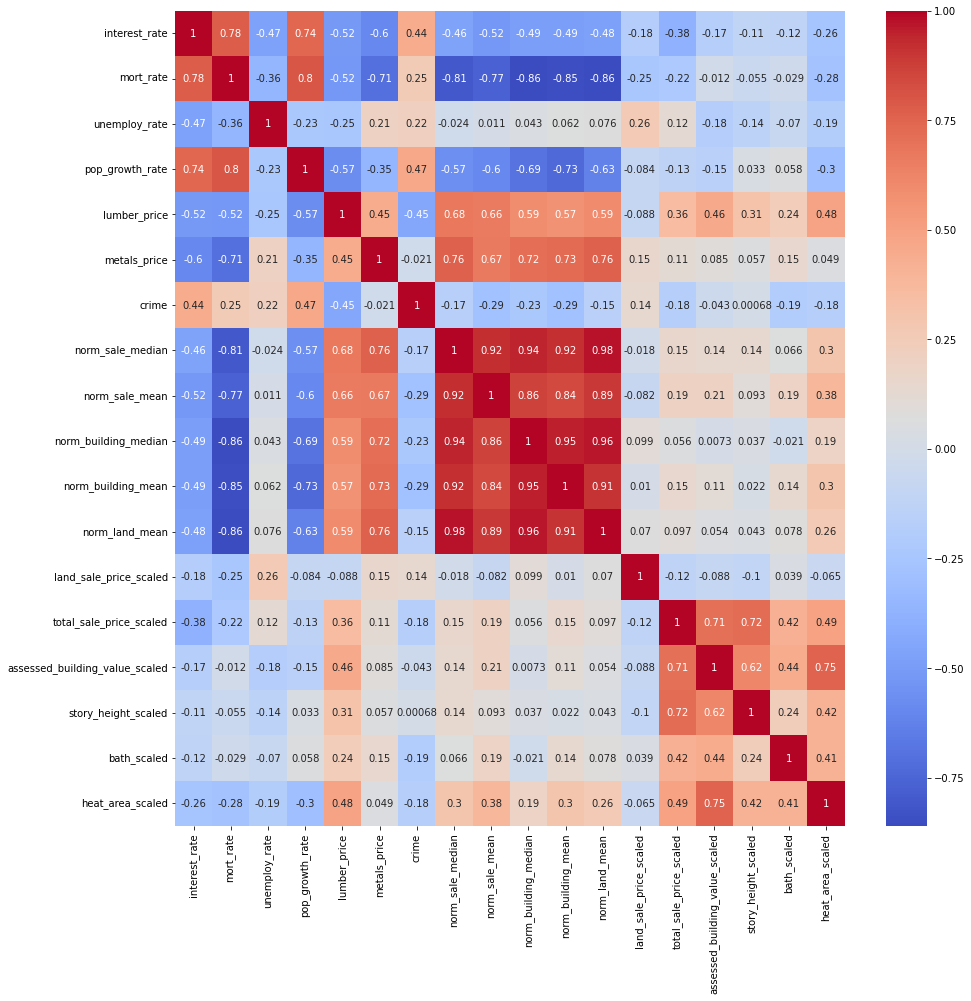

In [82]:
# normalized house, building, land and interest rate correlation heatmap
house_corr_df = price_summary[['interest_rate',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'lumber_price',
       'metals_price', 'crime', 'norm_sale_median', 'norm_sale_mean',
       'norm_building_median', 'norm_building_mean', 'norm_land_mean',
       'land_sale_price_scaled', 'total_sale_price_scaled',
       'assessed_building_value_scaled', 'story_height_scaled', 'bath_scaled',
       'heat_area_scaled']]
corr = house_corr_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [85]:
df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'type_and_use', 'physical_zip_code', 'physical_city', 'mort_rate',
       'unemploy_rate', 'pop_growth_rate', 'covid_cases', 'lumber_price',
       'metals_price', 'build_price', 'int_rate', 'us_supply_house_number',
       'us_house_afford_index', 'wake_supply_index', 'wake_demand_index',
       'year', 'crime', 'electric', 'gas', 'water', 'sewer', 'all',
       'land_sale_price_scaled', 'total_sale_price_scaled',
       'assessed_building_value_scaled', 'norm_sale_price', 'norm_land_price',
       'norm_building_value', 'story_height_scaled', 'bath_scaled',
       'heat_area_scaled'],
      dtype='object')

We use log transformation to normalize house sale price, land sale price, and building values. (`norm_`)

We also use Min-Max transformation to normalize the above variables. (`_scaled`)

In [47]:
df['norm_sale_price'] = np.log(df['total_sale_price'])
df['norm_land_price'] = np.log(df['land_sale_price'])
df['norm_building_value'] = np.log(df['assessed_building_value'])

c:\Users\aliso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
corr_df = df[['total_sale_price',
              'norm_sale_price', 
              'norm_land_price',
              'norm_building_value',
              'land_sale_price_scaled', 
              'total_sale_price_scaled',
              'assessed_building_value_scaled',
              'story_height_scaled', 
              'bath_scaled',
              'heat_area_scaled',
              'story_height', 
              'heated_area', 
              'bath', 
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price',
              'int_rate',
              'us_supply_house_number',
              'us_house_afford_index',
              'wake_supply_index',
              'wake_demand_index',
              'electric',
              'gas',
              'water',
              'sewer',
              'all']].copy()

<AxesSubplot:>

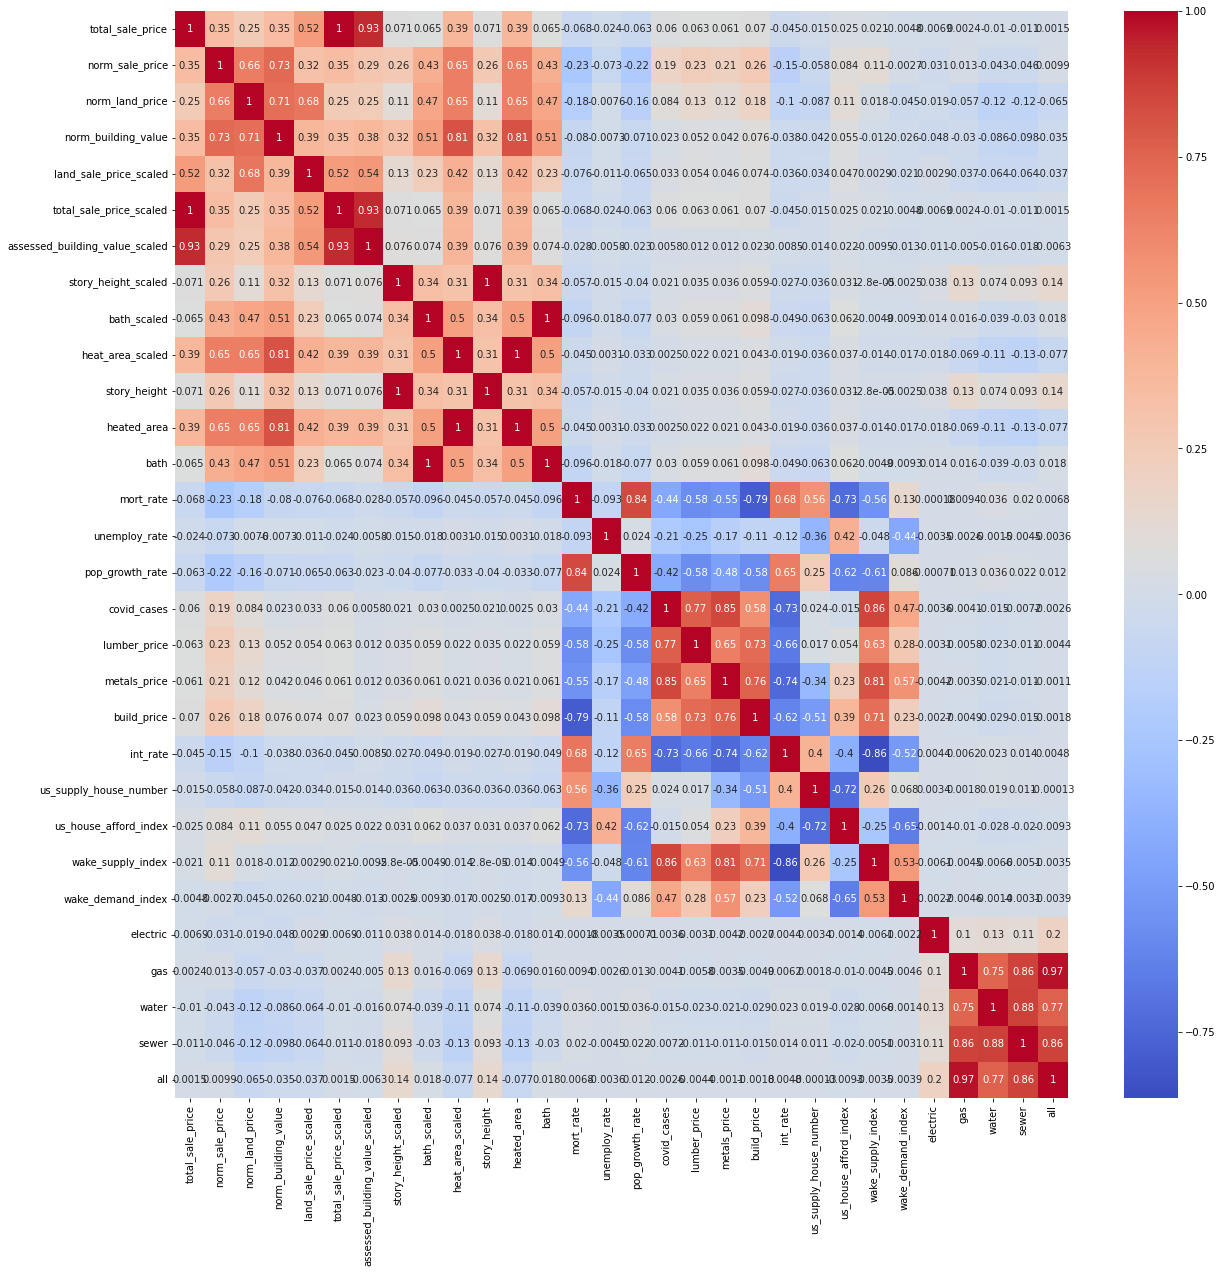

In [87]:
corr = corr_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')